In [1]:
# Import necessary libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [2]:
# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target  # Features and target

# Standardize the features (important for Linear Regression stability)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Training samples: 16512, Test samples: 4128


In [ ]:
# Custom implementation of Linear Regression
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    # Train the model
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    # Make predictions
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [4]:
# Train model
lr_scratch = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
lr_scratch.fit(X_train, y_train)

# Predictions
y_pred_scratch = lr_scratch.predict(X_test)

# Evaluate performance
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
print(f"Custom Linear Regression MSE: {mse_scratch:.4f}")


Custom Linear Regression MSE: 0.5673


In [5]:
# Train scikit-learn's Linear Regression
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)

# Predictions
y_pred_sklearn = lr_sklearn.predict(X_test)

# Evaluate performance
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f"Sklearn Linear Regression MSE: {mse_sklearn:.4f}")


Sklearn Linear Regression MSE: 0.5559


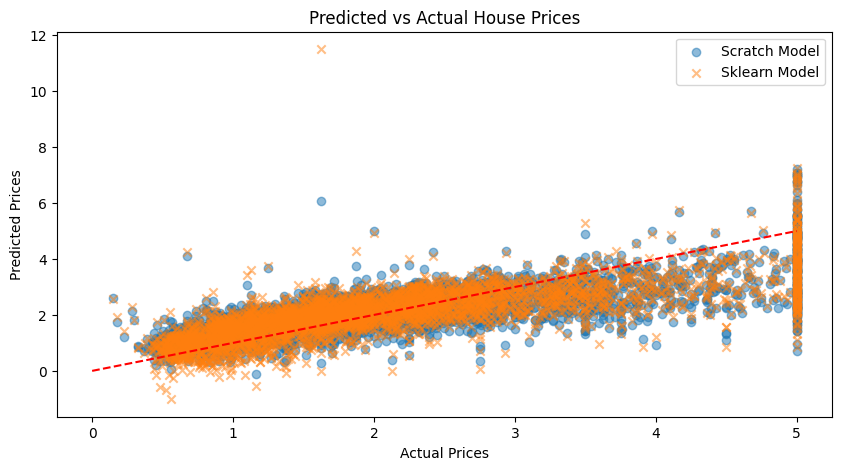

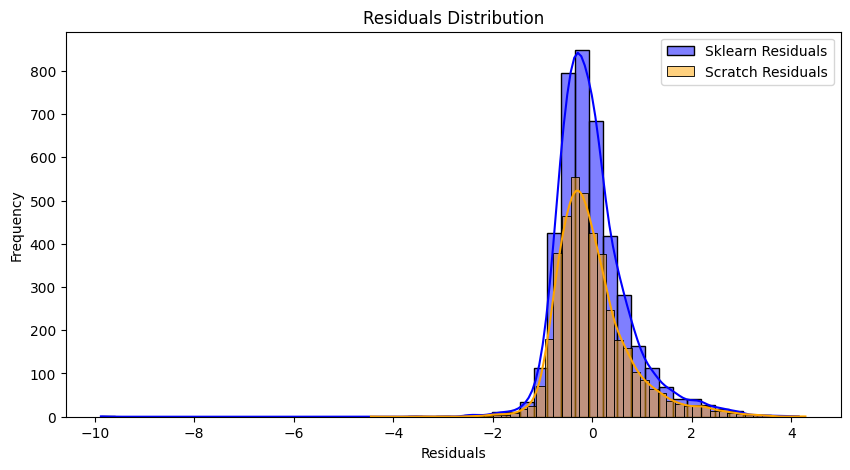

In [6]:
# Plot Predicted vs Actual for both models
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_scratch, label="Scratch Model", alpha=0.5)
plt.scatter(y_test, y_pred_sklearn, label="Sklearn Model", alpha=0.5, marker="x")
plt.plot([0, 5], [0, 5], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("Predicted vs Actual House Prices")
plt.show()

# Residual Plot
plt.figure(figsize=(10, 5))
sns.histplot(y_test - y_pred_sklearn, bins=50, kde=True, color="blue", label="Sklearn Residuals")
sns.histplot(y_test - y_pred_scratch, bins=50, kde=True, color="orange", label="Scratch Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.title("Residuals Distribution")
plt.show()
